In [47]:
import pyforest
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:/cIN/Imarticus/snsdata.csv")

<IPython.core.display.Javascript object>

In [3]:
#this is for teenage college going
# they want to target the customers based ion similarity


df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
df.shape

(30000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [6]:
df.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [8]:
#cleaning
df.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [9]:
df.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [10]:
df.gender.fillna('F')

0        M
1        F
2        M
3        F
4        F
        ..
29995    M
29996    M
29997    M
29998    M
29999    F
Name: gender, Length: 30000, dtype: object

In [11]:
df.age=df.age.fillna(df.age.mean())

In [12]:
df.gender=df.gender.replace({'F':1,'M':0})

In [13]:
df.dropna()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0.0,18.98200,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.80100,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0.0,18.33500,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.87500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,1.0,17.99395,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,0.0,16.11500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,0.0,15.79200,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,0.0,15.78400,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,0.0,16.37800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0.0,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,1.0,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,0.0,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,1.0,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [15]:
df.gender.value_counts()

1.0    22054
0.0     5222
Name: gender, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

gradyear        0
gender          0
age             0
friends         0
basketball      0
football        0
soccer          0
softball        0
volleyball      0
swimming        0
cheerleading    0
baseball        0
tennis          0
sports          0
cute            0
sex             0
sexy            0
hot             0
kissed          0
dance           0
band            0
marching        0
music           0
rock            0
god             0
church          0
jesus           0
bible           0
hair            0
dress           0
blonde          0
mall            0
shopping        0
clothes         0
hollister       0
abercrombie     0
die             0
death           0
drunk           0
drugs           0
dtype: int64

In [18]:
#df.gender=df.gender.fillna(df.mode())

In [19]:
kmean_sns=KMeans(n_clusters=3)

In [20]:
kmean_sns.fit(df)

KMeans(n_clusters=3)

In [21]:
kmean_sns.labels_

array([0, 0, 1, ..., 0, 0, 0])

In [22]:
list1=list(kmean_sns.labels_)

In [23]:
list1.count(1)

7871

In [24]:
list1.count(2)

1179

In [25]:
kmean_sns.cluster_centers_ # k=3 means 3 clusters each cluster have 1 centre have 40 dimnesion

array([[2.00746022e+03, 7.88434105e-01, 1.80059145e+01, 1.14821683e+01,
        2.51673434e-01, 2.47613300e-01, 2.10907495e-01, 1.35520685e-01,
        1.28113684e-01, 1.27619884e-01, 9.37671458e-02, 1.00954680e-01,
        8.47690113e-02, 1.39910019e-01, 2.96664106e-01, 2.14857895e-01,
        1.36892352e-01, 1.19225283e-01, 1.02106880e-01, 3.96137386e-01,
        2.95676506e-01, 3.84066718e-02, 7.39602765e-01, 2.40700099e-01,
        4.32952924e-01, 2.24130363e-01, 1.00406013e-01, 2.11785362e-02,
        4.16438056e-01, 1.03917481e-01, 8.31230111e-02, 2.33622298e-01,
        3.22780643e-01, 1.45396686e-01, 5.66772742e-02, 4.26314057e-02,
        1.81498958e-01, 1.10501481e-01, 8.81158784e-02, 6.41391419e-02],
       [2.00758036e+03, 8.40935078e-01, 1.78646739e+01, 5.74127811e+01,
        3.19019184e-01, 2.93609452e-01, 2.61974336e-01, 2.29322831e-01,
        1.81044340e-01, 1.57794435e-01, 1.29716681e-01, 1.24761784e-01,
        9.45242028e-02, 1.61224749e-01, 3.82416466e-01, 2.15728

In [26]:
kmean_sns.score(df)  #SSD

-10469159.89391151

In [27]:
# elbow method
df_ssd=[]
for k in range(1,11):
    kmean_sns=KMeans(n_clusters=k)
    kmean_sns.fit(df)
    score=kmean_sns.score(df)
    df_ssd.append(score)
    


In [28]:
df_ssd

[-38694342.03916395,
 -17231630.351791456,
 -10467414.077531146,
 -7543146.592258449,
 -5885068.938561798,
 -4749479.052546681,
 -3683269.5009227577,
 -2876366.7779303603,
 -2370051.258651919,
 -2063604.620434763]

In [29]:
df_ssd=np.round(np.abs(df_ssd))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
df_ssd

array([38694342., 17231630., 10467414.,  7543147.,  5885069.,  4749479.,
        3683270.,  2876367.,  2370051.,  2063605.])

In [31]:
num=(1,2,3,4,5,6,7,8,9,10)

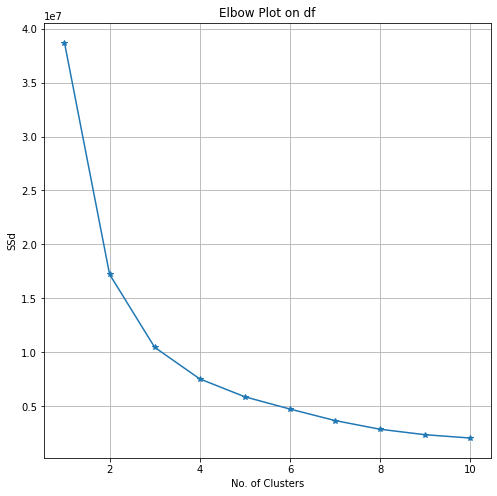

In [32]:
plt.figure(figsize=(8,8))
plt.plot(num,df_ssd,marker="*")
plt.xlabel("No. of Clusters")
plt.ylabel("SSd")
plt.title("Elbow Plot on df")
plt.grid()

           

In [33]:
kmean_sns=KMeans(n_clusters=4)
kmean_sns.fit(df)

    

KMeans(n_clusters=4)

In [34]:
center_df=kmean_sns.cluster_centers_

In [35]:
center_df

array([[2.00744765e+03, 7.85472389e-01, 1.81064719e+01, 7.14133665e+00,
        2.38164351e-01, 2.43209621e-01, 1.99875596e-01, 1.27237542e-01,
        1.17699910e-01, 1.22399613e-01, 8.95016933e-02, 9.75879466e-02,
        8.33506117e-02, 1.36706061e-01, 2.83917341e-01, 2.17015689e-01,
        1.35392909e-01, 1.15142719e-01, 1.00352478e-01, 3.83578685e-01,
        2.87165665e-01, 3.74593959e-02, 7.16981132e-01, 2.34708688e-01,
        4.22282120e-01, 2.15495197e-01, 9.72423803e-02, 2.00428502e-02,
        4.13020941e-01, 1.01181837e-01, 8.39726311e-02, 2.28073813e-01,
        3.11562651e-01, 1.41060198e-01, 5.49450549e-02, 4.14679660e-02,
        1.83841316e-01, 1.08784297e-01, 8.80503145e-02, 6.73163315e-02],
       [2.00779892e+03, 9.24596050e-01, 1.76353919e+01, 1.81910233e+02,
        4.29084381e-01, 3.08797127e-01, 2.56732496e-01, 2.47755835e-01,
        2.38779174e-01, 1.72351885e-01, 1.93895871e-01, 1.16696589e-01,
        1.11310592e-01, 1.43626571e-01, 5.27827648e-01, 2.65709

In [36]:
center_df=pd.DataFrame(kmean_sns.cluster_centers_)

<IPython.core.display.Javascript object>

In [37]:
center_df  #each row is a center of a cluster with 40 co-ordinatess each

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2007.447647,0.785472,18.106472,7.141337,0.238164,0.243210,0.199876,0.127238,0.117700,0.122400,...,0.083973,0.228074,0.311563,0.141060,0.054945,0.041468,0.183841,0.108784,0.088050,0.067316
1,2007.798923,0.924596,17.635392,181.910233,0.429084,0.308797,0.256732,0.247756,0.238779,0.172352,...,0.143627,0.430880,0.535009,0.193896,0.141831,0.118492,0.220826,0.143627,0.127469,0.066427
2,2007.637528,0.859410,17.885864,83.180401,0.327951,0.295100,0.279232,0.249443,0.191258,0.161470,...,0.114699,0.339365,0.469655,0.165646,0.103285,0.077394,0.179566,0.127784,0.098552,0.056793
3,2007.527605,0.818549,17.755892,38.201086,0.310233,0.279048,0.249711,0.198198,0.172673,0.150728,...,0.126819,0.274197,0.393278,0.162162,0.078309,0.055671,0.191961,0.129591,0.089166,0.058674


In [38]:
center_df.columns=df.columns

In [39]:
center_df  #customer going to delivered

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007.447647,0.785472,18.106472,7.141337,0.238164,0.243210,0.199876,0.127238,0.117700,0.122400,...,0.083973,0.228074,0.311563,0.141060,0.054945,0.041468,0.183841,0.108784,0.088050,0.067316
1,2007.798923,0.924596,17.635392,181.910233,0.429084,0.308797,0.256732,0.247756,0.238779,0.172352,...,0.143627,0.430880,0.535009,0.193896,0.141831,0.118492,0.220826,0.143627,0.127469,0.066427
2,2007.637528,0.859410,17.885864,83.180401,0.327951,0.295100,0.279232,0.249443,0.191258,0.161470,...,0.114699,0.339365,0.469655,0.165646,0.103285,0.077394,0.179566,0.127784,0.098552,0.056793
3,2007.527605,0.818549,17.755892,38.201086,0.310233,0.279048,0.249711,0.198198,0.172673,0.150728,...,0.126819,0.274197,0.393278,0.162162,0.078309,0.055671,0.191961,0.129591,0.089166,0.058674


In [40]:
#final df
list2=list(kmean_sns.labels_)


In [41]:
final_df=pd.concat([df,pd.Series(kmean_sns.labels_)],axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
final_df.shape

(29752, 41)

In [43]:
final_df=final_df.rename(columns={final_df.columns[40]:"Labels"})

In [44]:
final_df.head(20)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels
0,2006.0,0.0,18.98200,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006.0,1.0,18.80100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006.0,0.0,18.33500,69.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,2006.0,1.0,18.87500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
5,2006.0,1.0,17.99395,142.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
6,2006.0,1.0,18.93000,72.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2006.0,0.0,18.32200,17.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
8,2006.0,1.0,19.05500,52.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
9,2006.0,1.0,18.70800,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
final_df=final_df.sort_values("Labels")

In [46]:
final_df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Labels
0,2006.0,0.0,18.982,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15146,2008.0,1.0,17.068,89.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15144,2008.0,1.0,16.304,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15142,2008.0,1.0,16.652,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15140,2008.0,1.0,17.191,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009.0,0.0,16.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
29996,2009.0,0.0,15.792,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
29997,2009.0,0.0,15.784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
29998,2009.0,0.0,16.378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


### DB Scan

In [48]:
from sklearn.preprocessing import StandardScaler,normalize

In [49]:
scaler=StandardScaler()

In [50]:
scaler_sn1=scaler.fit_transform(df)

In [51]:
scaler_sn1

array([[-1.34682544, -2.05506353,  0.14335598, ..., -0.26452219,
        -0.22360514, -0.17776788],
       [-1.34682544,  0.48660296,  0.1180533 , ..., -0.26452219,
        -0.22360514, -0.17776788],
       [-1.34682544, -2.05506353,  0.0529094 , ...,  1.9658046 ,
        -0.22360514, -0.17776788],
       ...,
       [ 1.33750894, -2.05506353, -0.30370456, ..., -0.26452219,
        -0.22360514, -0.17776788],
       [ 1.33750894, -2.05506353, -0.22066705, ..., -0.26452219,
        -0.22360514, -0.17776788],
       [ 1.33750894,  0.48660296,  0.10728918, ..., -0.26452219,
        -0.22360514, -0.17776788]])

In [52]:
scaler_sn1.shape

(27276, 40)

In [57]:
df1=pd.DataFrame(scaler_sn1)

<IPython.core.display.Javascript object>

In [64]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.346825,-2.055064,0.143356,-0.643464,-0.338539,-0.365331,-0.245785,-0.222235,-0.224707,-0.263242,...,-0.05055,-0.373081,-0.495182,-0.318122,-0.201671,-0.184866,-0.304323,-0.264522,-0.223605,-0.177768
1,-1.346825,0.486603,0.118053,-0.834460,-0.338539,1.025037,-0.245785,-0.222235,-0.224707,-0.263242,...,-0.05055,1.053549,-0.495182,-0.318122,-0.201671,-0.184866,-0.304323,-0.264522,-0.223605,-0.177768
2,-1.346825,-2.055064,0.052909,1.048214,-0.338539,1.025037,-0.245785,-0.222235,-0.224707,-0.263242,...,-0.05055,-0.373081,-0.495182,-0.318122,-0.201671,-0.184866,-0.304323,1.965805,-0.223605,-0.177768
3,-1.346825,0.486603,0.128398,-0.834460,-0.338539,-0.365331,-0.245785,-0.222235,-0.224707,-0.263242,...,-0.05055,-0.373081,-0.495182,-0.318122,-0.201671,-0.184866,-0.304323,-0.264522,-0.223605,-0.177768
4,-1.346825,0.486603,0.005233,3.040028,-0.338539,-0.365331,-0.245785,-0.222235,-0.224707,-0.263242,...,-0.05055,-0.373081,0.869396,-0.318122,-0.201671,-0.184866,-0.304323,-0.264522,2.244648,-0.177768


In [59]:
scaler_sn1=normalize(scaler_sn1)

In [60]:
dbscan=DBSCAN(eps=0.6,min_samples=7)  ## eps dist=min dist, min_sampls=7 ,here 0.6,7 is by choice
model_db=dbscan.fit(scaler_sn1)  ## model created

In [61]:
model_db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
list3= list(model_db.labels_)

In [63]:
np.unique(list3)  #  -1:noise point :::0,1,2,3: no of cluster or clusters

<IPython.core.display.Javascript object>

array([-1,  0,  1,  2,  3], dtype=int64)

In [66]:
list3.count(-1)

7074

In [67]:
list3.count(0)

20142

In [68]:
list3.count(1)

43

In [69]:
list3.count(2)

11

In [70]:
list3.count(3)

6